In [1]:
%matplotlib inline

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from pathlib import Path

import magnum
from magnum.solvers.cegis import solve
from magnum.mpc import mpc

import pandas as pd
import stl

import traces

In [3]:
import funcy as fn

# Feasible Example

In [4]:
from magnum.examples.feasible_example import feasible_example as g

In [5]:
res, _ = solve(g)

In [6]:
res

Result(feasible=True, cost=5.0, solution={'x': <TimeSeries>
SortedDict(None, 1000, {0: 0.0, 1: 10.0})
</TimeSeries>, 'u': <TimeSeries>
SortedDict(None, 1000, {0: 1.0})
</TimeSeries>})

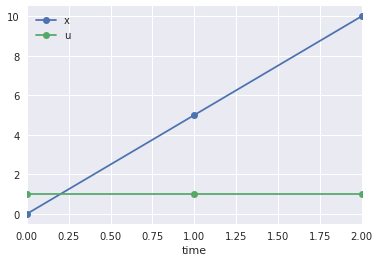

In [7]:
for name, trace in res.solution.items():
    df = trace.moving_average(g.model.dt, pandas=True)
    df.plot(label=name, style=['o-'])

plt.xlabel('time')
plt.legend()

# Feasible Example MPC

In [8]:
from magnum.examples.feasible_example import feasible_example as g

solutions = mpc(g)

In [9]:
def trace_to_df(trace, name, dt):
    index, values = zip(*trace.sample(dt))
    return pd.DataFrame(list(values), columns=[name], index=index)

def solution_to_df(solution, dt):
    return pd.concat([trace_to_df(trace, name, dt) for name, trace in solution.items()], axis=1, join='inner')

In [10]:
dfs = (solution_to_df(sol, g.model.dt) for sol in solutions )

x = 0.0
0 0 1 False range(0, 1)
x = 0.0
0 1 1 False range(0, 1)
x = 10.0
0 2 1 True range(0, 1)
x = 20.0
0 3 1 True range(0, 1)
x = 30.0
0 4 1 True range(0, 1)


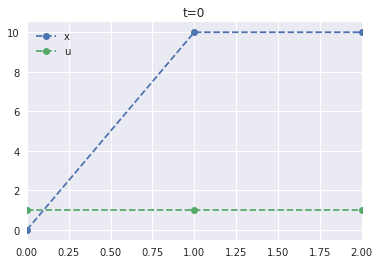

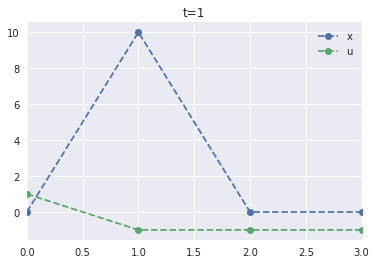

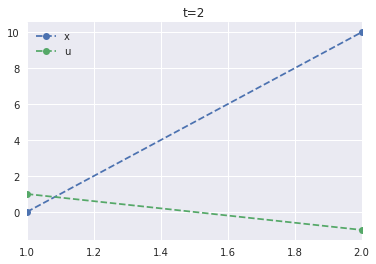

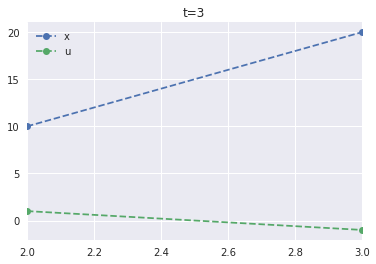

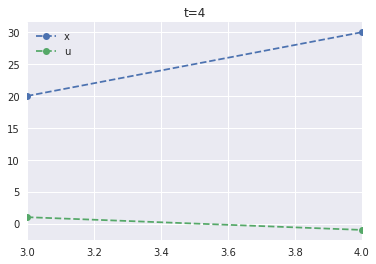

In [11]:
for i, df in enumerate(fn.take(5, dfs)):
    df.plot(style='--o', title=f't={i}')

# Feasible 3 MPC

In [53]:
from magnum.examples.feasible_example3 import feasible_example as g

solutions = mpc(g)

In [54]:
g.scaled_scope

5

In [55]:
s = fn.take(g.scaled_scope*4, solutions)

x = 3.0
0 0 5 False range(0, 1)
(x = 3.0) ∧ (◯(x = -2.0))
1 1 5 False range(0, 2)
(x = 3.0) ∧ (◯(x = -2.0)) ∧ (◯(◯(x = 0.0)))
2 2 5 False range(0, 3)
(x = 3.0) ∧ (◯(x = -2.0)) ∧ (◯(◯(x = 0.0))) ∧ (◯(◯(◯(x = 10.0))))
3 3 5 False range(0, 4)
(x = 3.0) ∧ (◯(x = -2.0)) ∧ (◯(◯(x = 0.0))) ∧ (◯(◯(◯(x = 10.0)))) ∧ (◯(◯(◯(◯(x = 0.0)))))
4 4 5 False range(0, 5)
(x = 3.0) ∧ (◯(x = -2.0)) ∧ (◯(◯(x = 0.0))) ∧ (◯(◯(◯(x = 10.0)))) ∧ (◯(◯(◯(◯(x = 0.0)))))
4 5 5 False range(0, 5)
(x = -2.0) ∧ (◯(x = 0.0)) ∧ (◯(◯(x = 10.0))) ∧ (◯(◯(◯(x = 0.0)))) ∧ (◯(◯(◯(◯(x = -10.0)))))
4 6 5 True range(0, 5)
(x = 0.0) ∧ (◯(x = 10.0)) ∧ (◯(◯(x = 0.0))) ∧ (◯(◯(◯(x = -10.0)))) ∧ (◯(◯(◯(◯(x = 0.0)))))
4 7 5 True range(0, 5)
(x = 10.0) ∧ (◯(x = 0.0)) ∧ (◯(◯(x = -10.0))) ∧ (◯(◯(◯(x = 0.0)))) ∧ (◯(◯(◯(◯(x = 10.0)))))
4 8 5 True range(0, 5)
(x = 0.0) ∧ (◯(x = -10.0)) ∧ (◯(◯(x = 0.0))) ∧ (◯(◯(◯(x = 10.0)))) ∧ (◯(◯(◯(◯(x = 0.0)))))
4 9 5 True range(0, 5)
(x = -10.0) ∧ (◯(x = 0.0)) ∧ (◯(◯(x = 10.0))) ∧ (◯(◯(◯(x = 0.0)))) ∧ (◯(◯(

In [70]:
u = traces.TimeSeries()
x = traces.TimeSeries()

for i in range(20):
    u[i] = s[i]['u'][i]
    x[i] = s[i]['x'][i]

In [71]:
s2 = {'u': u, 'x':x}

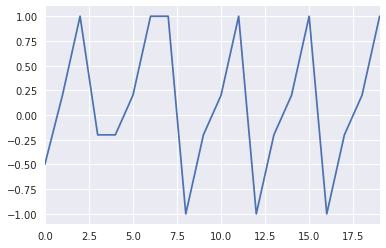

In [76]:
solution_to_df(s2, g.model.dt).u.plot()
plt.show()

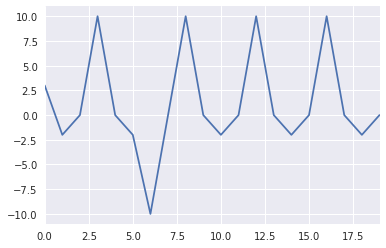

In [77]:
solution_to_df(s2, g.model.dt).x.plot()
plt.show()

(x = 0.0) ∧ (◯(x = 10.0)) ∧ (◯(◯(x = 0.0))) ∧ (◯(◯(◯(x = -2.0)))) ∧ (◯(◯(◯(◯(x = 0.0)))))
4 7 5 True range(0, 5)
(x = 10.0) ∧ (◯(x = 0.0)) ∧ (◯(◯(x = -2.0))) ∧ (◯(◯(◯(x = 0.0)))) ∧ (◯(◯(◯(◯(x = 10.0)))))
4 8 5 True range(0, 5)


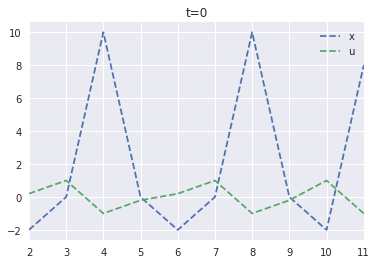

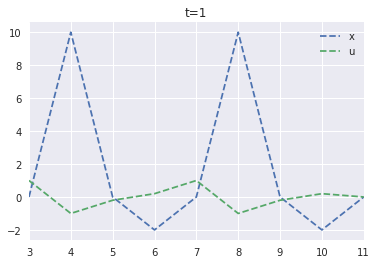

In [24]:
for i, df in enumerate(fn.take(2, dfs)):
    df.plot(style='--', title=f't={i}')

# Rock, Paper, Scissors

In [19]:
from magnum.examples.rock_paper_scissors import rps as g

In [20]:
res, counter_examples = solve(g)

In [21]:
res

Result(feasible=False, cost=None, solution=None)

In [22]:
counter_examples

[{'w': <TimeSeries>
  SortedDict(None, 1000, {0: 0.9999999999999999})
  </TimeSeries>}, {'w': <TimeSeries>
  SortedDict(None, 1000, {0: 0.3333333333333333})
  </TimeSeries>}, {'w': <TimeSeries>
  SortedDict(None, 1000, {0: 0.6666666666666666})
  </TimeSeries>}]